# <center>FINAL PROJECT: International Football After War II<center>

# *Team Information

| FULL NAME             | ID NUMBER |
| :-----------          |     :----:|
| Nguyễn Thiện Hoàng Trí| 20127088  |
| Nguyễn Phước Gia Huy  | 20127038  |


---

## 1. Introduction

### 1.1. Data information

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

The data is gathered from several sources including but not limited to Wikipedia, rsssf.com, and individual football associations' websites.

### 1.2. Attribute information

- `results.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `home_score` - full-time home team score including extra time, not including penalty-shootouts
    - `away_score` - full-time away team score including extra time, not including penalty-shootouts
    - `tournament` - the name of the tournament
    - `city` - the name of the city/town/administrative unit where the match was played
    - `country` - the name of the country where the match was played
    - `neutral` - TRUE/FALSE column indicating whether the match was played at a neutral venue
- `shootouts.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `winner` - winner of the penalty-shootout
- `goalscorers.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `team` - name of the team scoring the goal
    - `scorer` - name of the player scoring the goal
    - `own_goal` - whether the goal was an own-goal
    - `penalty` - whether the goal was a penalty
    
#### NOTE:
Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

### 1.3. Why we select this dataset?
Currently, World Cup 2022 has been received a great deal of public concern over the world. Also both of us are a big fan of this tournament so we decide to explore and analyze more about dataset about football events. After selecting carefully on Kaggle, we find that this dataset ([here](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)) has enough information we need for our project.

## 2. Data Exploration

### IMPORT

In [1]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fbmatches_df = pd.read_csv("results.csv")
scorers_df = pd.read_csv("goalscorers.csv")
penalty_df = pd.read_csv("shootouts.csv")

In [3]:
scorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


### How many rows and columns in dataset?
Use pandas to find the number of rows and columns and store in 2 lists `num_rows` and `num_cols`.

In [4]:
RC={}
num_rows=[]
num_cols=[]

num_rows.append(fbmatches_df.shape[0])
num_rows.append(scorers_df.shape[0])
num_rows.append(penalty_df.shape[0])

num_cols.append(fbmatches_df.shape[1])
num_cols.append(scorers_df.shape[1])
num_cols.append(penalty_df.shape[1])

RC['num_rows']=num_rows
RC['num_cols']=num_cols

RC_df=pd.DataFrame(RC,index=['fbmatches_df','scorers_df','penalty_df'])
RC_df

,num_rows,num_cols
fbmatches_df,44353,9
scorers_df,41008,8
penalty_df,547,4


### What is the meaning of each row? Are there any 2 rows with different meaning?
According to data description of the course and by taking a quick look at the data, each line provides information about a match. It seems that there is no outlier line.

### Is the data duplicated?
We going to check that if the value of variable is 1 , the data is duplicated and vice versa

In [5]:
#results.csv
fbmatches_df.index.duplicated().sum() 

0

In [6]:
#goalscorers.csv
scorers_df.index.duplicated().sum() 

0

In [7]:
#shootouts.csv
penalty_df.index.duplicated().sum()

0

### What is the current data type of each column? Are there columns having inappropriate data types?

We  check the datatype (`dtype`) of each element in a column in `fbmatches_df`,`scorers_df`,`penalty_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [8]:
col_dtypes=fbmatches_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [9]:
col_dtypes=scorers_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
team          object
scorer        object
minute       float64
own_goal        bool
penalty         bool
dtype: object

In [10]:
col_dtypes=penalty_df.dtypes
col_dtypes


date         object
home_team    object
away_team    object
winner       object
dtype: object

All the columns have the suitable datatype.

### With each numerical column, how are values distributed?
It looks like that the datatype of columns are numeric. According to this approach, there will be 4 numeric columns ("home_score", "away_score" , "minute" and "date").

In [11]:
fbmatches_df['date']=pd.to_datetime(fbmatches_df['date'],format="%Y-%m-%d")
scorers_df['date']=pd.to_datetime(fbmatches_df['date'],format="%Y-%m-%d")
penalty_df['date']=pd.to_datetime(fbmatches_df['date'],format="%Y-%m-%d")

In [41]:
max_=[]
min_=[]
missing_val=[]

max_.append(max(fbmatches_df['date']))
max_.append(max(fbmatches_df['home_score']))
max_.append(max(fbmatches_df['away_score']))
max_.append(max(scorers_df['minute']))

min_.append(min(fbmatches_df['date']))
min_.append(min(fbmatches_df['home_score']))
min_.append(min(fbmatches_df['away_score']))
min_.append(min(scorers_df['minute']))

missing_val.append(fbmatches_df[fbmatches_df['date'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['home_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['away_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(scorers_df[scorers_df['minute'].isna()].shape[0]/scorers_df.shape[0] *100)

new_number_df=pd.DataFrame(columns=['Max','Min','Missing values'])
new_number_df['Max']=max_
new_number_df['Min']=min_
new_number_df['Missing values']=missing_val

new_number_df.index = ['date','home_score', 'away_score','minute']


new_number_df

,Max,Min,Missing values
date,2022-12-18 00:00:00,1872-11-30 00:00:00,0.000000
home_score,31,0,0.000000
away_score,21,0,0.000000
minute,122.0,1.0,0.629146


### How does the categorical data distribute? 
For each of categorical column, compute the percentage of missing values, number of different values (missing values are not counted), a list of different values (missing values are not counted) and store them into a dataframe named cate_col_profiles_df. 

Categorical data of `fbmatches_df`:

In [13]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','tournament','city','country'])

cate_col_profiles_df.loc['missing_ratio']=fbmatches_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(fbmatches_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=fbmatches_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=fbmatches_df['home_team'].dropna().unique()
new_list['away_team']=fbmatches_df['away_team'].dropna().unique()
new_list['tournament']=fbmatches_df['tournament'].dropna().unique()
new_list['city']=fbmatches_df['city'].dropna().unique()
new_list['country']=fbmatches_df['country'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,tournament,city,country
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,311.0,306.0,141.0,2010.0,267.0
diff_vals,"[Scotland, England, Wales, Northern Ireland, U...","[England, Scotland, Wales, Northern Ireland, C...","[Friendly, British Home Championship, Évence C...","[Glasgow, London, Wrexham, Blackburn, Belfast,...","[Scotland, England, Wales, Ireland, United Sta..."


Categorical data of `scorers_df`:

In [14]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','team','scorer'])

cate_col_profiles_df.loc['missing_ratio']=scorers_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(scorers_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=scorers_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=scorers_df['home_team'].dropna().unique()
new_list['away_team']=scorers_df['away_team'].dropna().unique()
new_list['team']=scorers_df['team'].dropna().unique()
new_list['scorer']=scorers_df['scorer'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,team,scorer
missing_ratio,0.0,0.0,0.0,0.119489
num_diff_vals,220.0,220.0,220.0,13376.0
diff_vals,"[Chile, Argentina, Brazil, Uruguay, Paraguay, ...","[Uruguay, Chile, Brazil, Argentina, Paraguay, ...","[Uruguay, Argentina, Chile, Brazil, Paraguay, ...","[José Piendibene, Isabelino Gradín, Alberto Oh..."


Categorical data of `penalty_df`:

In [15]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','winner'])

cate_col_profiles_df.loc['missing_ratio']=penalty_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(penalty_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=penalty_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=penalty_df['home_team'].dropna().unique()
new_list['away_team']=penalty_df['away_team'].dropna().unique()
new_list['winner']=penalty_df['winner'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,winner
missing_ratio,0.0,0.0,0.0
num_diff_vals,162.0,172.0,159.0
diff_vals,"[India, South Korea, Thailand, Senegal, Guinea...","[Taiwan, Vietnam Republic, Iraq, South Korea, ...","[Taiwan, South Korea, Iraq, Thailand, Ghana, G..."


## 3. Preprocessing

### Drop every matches which were unofficial and after War II
We found that friendly matches were not suitable for us to explore so we decided to drop those rows.

In [16]:
#fbmatches_df = fbmatches_df[fbmatches_df['tournament'] != 'Friendly']
#fbmatches_df=fbmatches_df.reset_index(drop=True)
fbmatches_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False


In [17]:
# fbmatches_df = fbmatches_df[fbmatches_df['date'].dt.year >= 1945]
# scorers_df =scorers_df[scorers_df['date'].dt.year  >= 1945]
# penalty_df =penalty_df[penalty_df['date'].dt.year  >= 1945]

### Add column `score_status` to dataframe

We need the information of match status that illustrate the winner of the match to answer a question. Therefore, before analyzing data to answer questions, you should preprocess by adding column "score_status" to `fbmatches_df`.

In [18]:
fbmatches_df['score_status']=np.select([fbmatches_df['home_score']>fbmatches_df['away_score'],
                                 fbmatches_df['home_score']<fbmatches_df['away_score'],
                                 fbmatches_df['home_score']==fbmatches_df['away_score']],['H','A','D'])
fbmatches_df['team winner'] = fbmatches_df.apply(lambda x : x['home_team'] if x['home_score'] > x['away_score'] 
                                              else (x['away_team'] if x['home_score'] < x['away_score'] else np.nan),
                                              axis=1)
fbmatches_df['year']=pd.DatetimeIndex(fbmatches_df['date']).year
fbmatches_df['decade']=fbmatches_df['year'] - fbmatches_df['year'] %10
fbmatches_df['month'] = pd.DatetimeIndex(fbmatches_df['date']).month_name()
fbmatches_df['day of Week'] = pd.DatetimeIndex(fbmatches_df['date']).day_name()

In [19]:
fbmatches_df=fbmatches_df.reset_index(drop=True)
scorers_df=scorers_df.reset_index(drop=True)
penalty_df=penalty_df.reset_index(drop=True)

In [20]:
football_df=fbmatches_df.merge(penalty_df,how='left',on=['home_team','away_team','date'])
football_df['team winner']=football_df.apply(lambda x : x['winner'] 
                                             if not pd.isnull(x['winner']) and pd.isnull(x['team winner']) else x['team winner'],axis=1)
football_df.drop(columns=['winner'],inplace=True)

football_df['away_team'] = football_df['away_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['away_team'] = football_df['away_team'].replace(['Yemen DPR'], 'Yemen')
football_df['home_team'] = football_df['home_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['home_team'] = football_df['home_team'].replace(['Yemen DPR'], 'Yemen')
football_df['away_team'] = football_df['away_team'].replace(['German DR'], 'Germany')
football_df['home_team'] = football_df['home_team'].replace(['German DR'], 'Germany')


football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade,month,day of Week
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,NaN,1872,1870,November,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,1873,1870,March,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,1874,1870,March,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,NaN,1875,1870,March,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H,Scotland,1876,1870,March,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False,A,Taiwan,2022,2020,December,Wednesday
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,H,Vietnam,2022,2020,December,Wednesday
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,H,Croatia,2022,2020,December,Saturday
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,H,Singapore,2022,2020,December,Saturday


## 4. Data analyzing to answer questions

### Show the rank of each countries to find the best example for FIFA World Cup
In order to answer this question, we should perform 2 steps:
- Step 1: Slip `fbmatches_df` to 5 dataframe corresponding to 5 continents in over the world: `AFC`, `CONMEBOL`, `UEFA`, `CAF`, and `CONCACAF` based on leagues or tournaments occured for each continents
- Step 2: 

In [21]:
# Những năm đầu tiên được chơi bóng
# home_team=fbmatches_df['home_team'].unique()
#tournament=fbmatches_df['tournament'].unique()
AFC_df = fbmatches_df[(fbmatches_df['tournament'].str.contains('AFC',case=False)) & (fbmatches_df["tournament"].str.contains("NAFC") == False)]
CONMEBOL_df = fbmatches_df[fbmatches_df['tournament'].str.contains('COPA América',case=False)]
UEFA_df = fbmatches_df[fbmatches_df['tournament'].str.contains('UEFA',case=False) & (fbmatches_df["tournament"].str.contains("CONMEBOL") == False)]
CAF_df = fbmatches_df[fbmatches_df['tournament'].str.contains('African ',case=False) & (fbmatches_df["tournament"].str.contains("West") == False)]
CONCACAF_df =fbmatches_df[fbmatches_df['tournament'].str.contains('CONCACAF',case=False)]

AFC_df=AFC_df.reset_index(drop=True) # Asian
CONMEBOL_df=CONMEBOL_df.reset_index(drop=True) # South America
UEFA_df=UEFA_df.reset_index(drop=True) # European
CAF_df=CAF_df.reset_index(drop=True) # Africa
CONCACAF_df=CONCACAF_df.reset_index(drop=True) # North America

AFC_df['away_team'] = AFC_df['away_team'].replace(['Vietnam Republic'], 'Vietnam')
AFC_df['away_team'] = AFC_df['away_team'].replace(['Yemen DPR'], 'Yemen')
AFC_df['home_team'] = AFC_df['home_team'].replace(['Vietnam Republic'], 'Vietnam')
AFC_df['home_team'] = AFC_df['home_team'].replace(['Yemen DPR'], 'Yemen')

UEFA_df['away_team'] = UEFA_df['away_team'].replace(['German DR'], 'Germany')
UEFA_df['home_team'] = UEFA_df['home_team'].replace(['German DR'], 'Germany')

CAF_df= CAF_df[CAF_df['away_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['away_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['away_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['away_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['away_team'] != 'Tahiti']
CAF_df= CAF_df[CAF_df['away_team'] != 'Saint Pierre and Miquelon']

CAF_df= CAF_df[CAF_df['home_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['home_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['home_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['home_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['home_team'] != 'Tahiti']

AFC= list(AFC_df['away_team'].sort_values().unique())
CAF= list(CAF_df['away_team'].sort_values().unique())
UEFA= list(UEFA_df['away_team'].sort_values().unique())
CONCACAF= list(CONCACAF_df['away_team'].sort_values().unique())
CONMEBOL= ['Argentina' ,'Bolivia' ,'Brazil' ,'Chile' ,'Colombia' ,'Ecuador' ,'Paraguay' ,'Peru' ,'Uruguay','Venezuela']
OFC = ['American Samoa' ,'Cook Islands' ,'Fiji' ,'Kiribati' ,'New Caledonia' ,'New Zealand' 
          ,' Niue' ,'Papua New Guinea' ,'Samoa','Solomon Islands','Tahiti','Tonga','Tuvalu','Vanuatu']
# 'AFC' in fbmatches_df['tournament']
# fbmatches_df[fbmatches_df['tournament']=="CONMEBOL–UEFA Cup of Champions]

Countries_df = pd.DataFrame({
    'Team': AFC + CAF  + CONCACAF + CONMEBOL + OFC + UEFA
    'Organization' : ['AFC'] * len(AFC) + ['CAF'] * len(CAF) + ['CONCACAF'] * len(CONCACAF) + ['CONMEBOL'] * len(CONMEBOL) + ['OFC'] * len(OFC) + ['UEFA'] * len(UEFA),
    'Region' : ['Asia'] * len(AFC) + ['Africa'] * len(CAF) + ['North and Central America'] * len(CONCACAF) + ['South America'] * len(CONMEBOL) + ['Oceania'] * len(OFC) + ['Europe'] * len(UEFA),
})
Countries_df

Teams=list(football_df['home_team'].unique()) + list(football_df['away_team'].unique())
Teams_df=pd.DataFrame({'Team': list(set(Teams))})
Teams_df['First year']=Teams_df['Team'].apply(lambda x : football_df[(football_df['home_team']==x) | (football_df['away_team']==x)]['year'].values[0])
Teams_df['First decade']=Teams_df['First year']-Teams_df['First year']%10
Teams_df=Teams_df.merge(Countries_df,how='left',on=['Team'])
Teams_df.sort_values(by='First year',inplace=True)
Teams_df

,Team,First year,First decade,Organization,Region
123,Scotland,1872,1870,UEFA,Europe
167,England,1872,1870,UEFA,Europe
113,Wales,1876,1870,UEFA,Europe
26,Northern Ireland,1882,1880,UEFA,Europe
111,United States,1885,1880,CONCACAF,North and Central America
...,...,...,...,...,...
82,Biafra,2022,2020,NaN,NaN
115,Brunei Darussalam,2022,2020,NaN,NaN
80,Mapuche,2022,2020,NaN,NaN
185,Yoruba Nation,2022,2020,NaN,NaN


- AFC - Asian Football Confederation - `47 members` - founded in 1954, represents Asian nations in football. The main tournament is the AFC Asian Cup. ( But in this data AFC has `49 members`. Therefore, Israel join  UEFA member in 1994 and Kazakhstan join UEFA member in 2002)
- CAF - Confédération Africaine de Football - `54 members` - founded in 1957 - represents African nations in football. The main tournament is the African Cup of Nations.

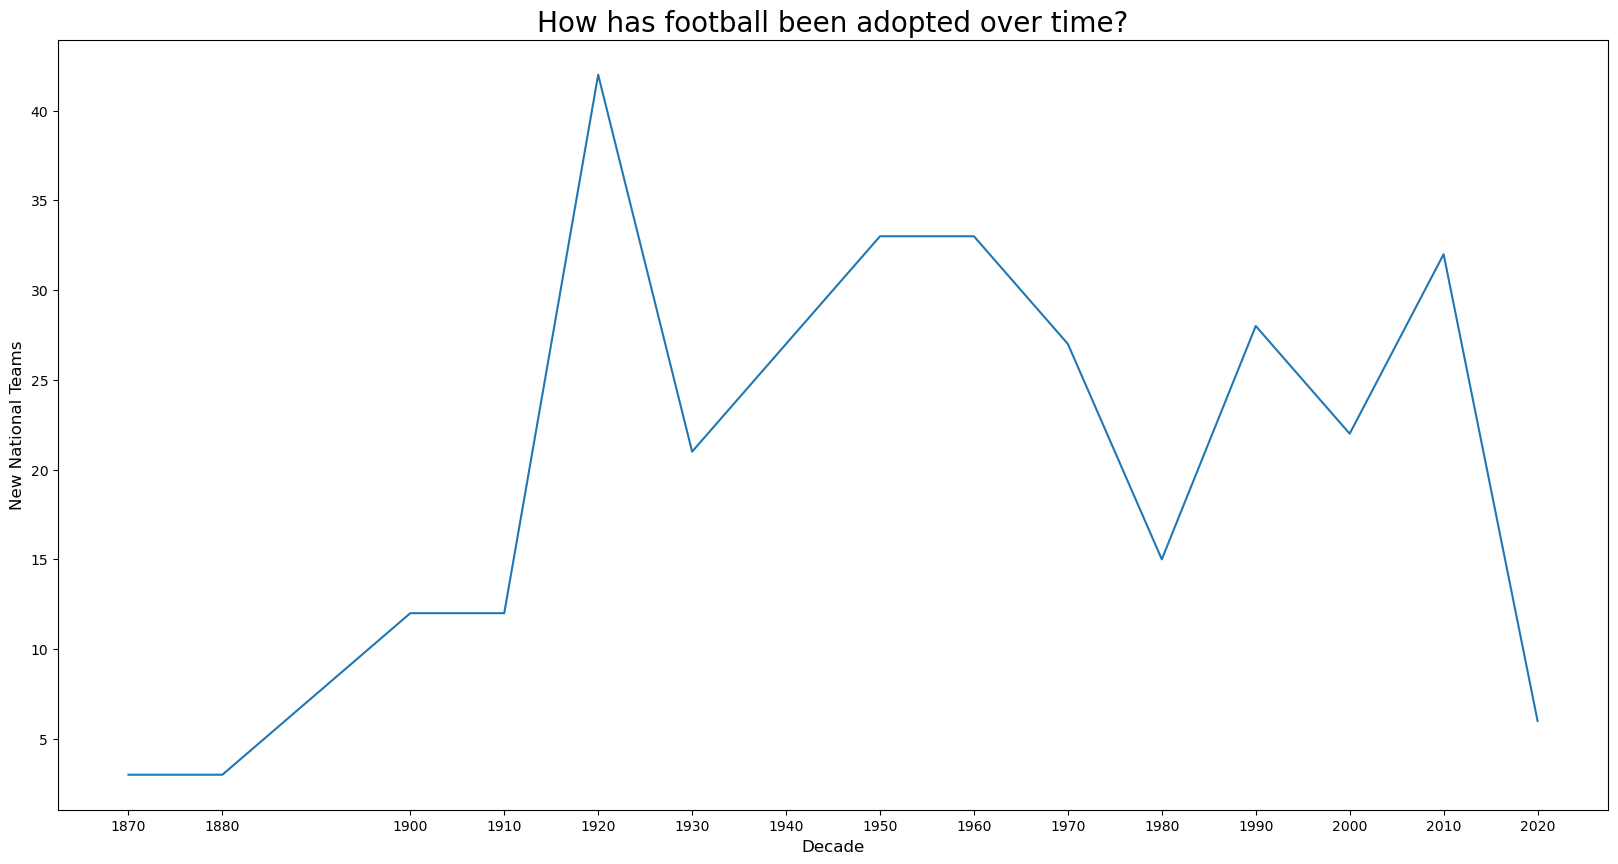

In [22]:
new_teams_decade = Teams_df['First decade'].value_counts().sort_index()

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=new_teams_decade, x=new_teams_decade.index, y=new_teams_decade.values)
ax.set_title('How has football been adopted over time?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
ax.set(xticks=new_teams_decade.index);

In [30]:
new_teams_decade_region_df= Teams_df.groupby(['First decade','Region']).size().unstack('Region')
new_teams_decade_region_df

Region,Africa,Asia,Europe,North and Central America,Oceania,South America
First decade,,,,,,
1870,NaN,NaN,3.0,NaN,NaN,NaN
1880,NaN,NaN,1.0,2.0,NaN,NaN
1900,NaN,NaN,10.0,NaN,NaN,2.0
1910,NaN,2.0,5.0,NaN,NaN,3.0
1920,4.0,2.0,14.0,13.0,1.0,2.0
1930,1.0,3.0,2.0,10.0,NaN,3.0
1940,11.0,8.0,5.0,2.0,NaN,NaN
1950,12.0,11.0,3.0,NaN,4.0,NaN
1960,17.0,9.0,NaN,2.0,2.0,NaN


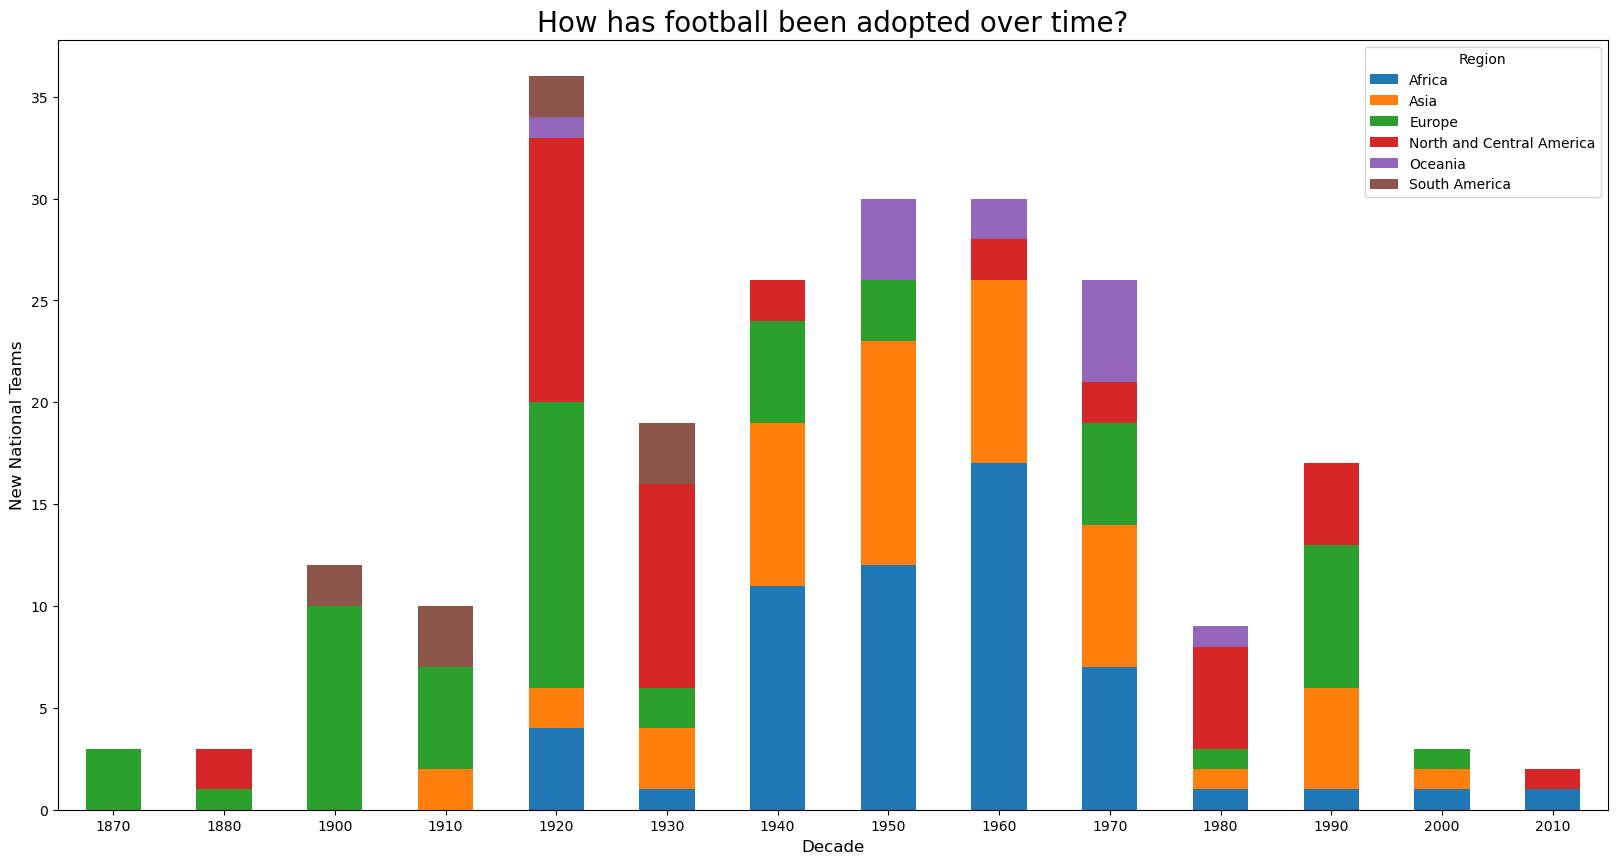

In [40]:
ax = new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('How has football been adopted over time?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
plt.xticks(rotation=0);